In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import 'random' to generate random sample
import random

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc



In [2]:
df_fifa = pd.read_csv('fifa_stats.csv')
df_fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [3]:
df_fifa.shape

(2000, 15)

In [4]:
df_fifa.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [5]:
df_num=df_fifa.select_dtypes(include=np.number)
df_num.head(3)

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,31,94,94,5,4,4,10,5.583333,159
1,33,94,94,5,4,5,7,6.166667,183
2,26,92,93,5,5,5,10,5.750000,150


# missing values

In [6]:
df_fifa.isnull().sum()[df_fifa.isnull().sum()>0]

Club    19
dtype: int64

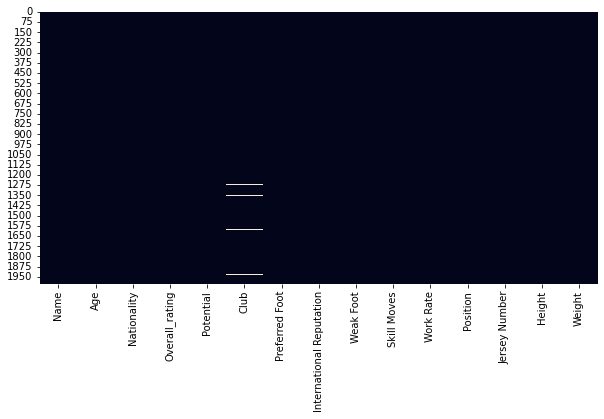

In [7]:
plt.rcParams["figure.figsize"]=[10,5]
sns.heatmap(df_fifa.isnull(),cbar = False)
plt.show()

In [8]:
df_cat=df_fifa.select_dtypes(include='object')
df_cat.head(3)

,Name,Nationality,Club,Preferred Foot,Work Rate,Position
0,L. Messi,Argentina,FC Barcelona,Left,Medium/ Medium,RF
1,Cristiano Ronaldo,Portugal,Juventus,Right,High/ Low,ST
2,Neymar Jr,Brazil,Paris Saint-Germain,Right,High/ Medium,LW


In [9]:
print(df_cat['Name'].unique())
print(df_fifa.Name.isnull().sum(),'\n')
print(df_cat['Name'].value_counts())

['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'A. Elis' 'M. FernÃ¡ndez'
 'D. RodrÃ\xadguez']
0 

Danilo           3
Marcelo          3
Paulinho         3
J. Cuadrado      2
OtÃ¡vio          2
                ..
Escudero         1
C. Tosun         1
Jaume Costa      1
G. Pezzella      1
D. RodrÃ­guez    1
Name: Name, Length: 1970, dtype: int64


In [10]:
print(df_fifa['Nationality'].isnull().sum(),'\n')
print(df_fifa['Nationality'].value_counts())
print(df_fifa['Nationality'].unique())

0 

Spain                251
Brazil               198
France               161
Argentina            143
Germany              126
                    ... 
Equatorial Guinea      1
Estonia                1
Angola                 1
Syria                  1
Honduras               1
Name: Nationality, Length: 95, dtype: int64
['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Sweden' 'Korea Republic' 'Finland' 'Guinea'
 'Montenegro' 'Armenia' 'Switzerland' 'Norway' 'Czech Republic' 'Scotland'
 'Ghana' 'Central African Rep.' 'DR Congo' 'Ivory Coast' 'Russia'
 'Ukraine' 'Iceland' 'Mexico' 'Jamaica' 'Albania' 'Venezuela' 'Japan'
 'Turkey' 'Ecuador' 'Paraguay' 'Mali' 'Nigeria' 'Cameroon'
 'Dominican Republic' 'Israel' 'Kenya' 'Hungary' 'Republic o

In [11]:
print(df_fifa['Club'].isnull().sum(),'\n')
print(df_cat['Club'].value_counts(),'\n')
print(df_cat['Club'].unique(),'\n')
print(df_fifa['Club'].mode())
print(df_fifa.Club.replace(np.NaN,"Chelsea " ,inplace = True))
print(df_fifa['Club'].isnull().sum(),'\n')

19 

Chelsea                    24
Liverpool                  23
Manchester United          23
Borussia Dortmund          23
Napoli                     23
                           ..
Real Sporting de GijÃ³n     1
SV Zulte-Waregem            1
Real Oviedo                 1
Boavista FC                 1
Club Necaxa                 1
Name: Club, Length: 285, dtype: int64 

['FC Barcelona' 'Juventus' 'Paris Saint-Germain' 'Manchester United'
 'Manchester City' 'Chelsea' 'Real Madrid' 'AtlÃ©tico Madrid'
 'FC Bayern MÃ¼nchen' 'Tottenham Hotspur' 'Liverpool' 'Napoli' 'Arsenal'
 'Milan' 'Inter' 'Lazio' 'Borussia Dortmund' 'Vissel Kobe'
 'Olympique Lyonnais' 'Roma' 'Valencia CF'
 'Guangzhou Evergrande Taobao FC' 'FC Porto' 'FC Schalke 04'
 'BeÅŸiktaÅŸ JK' 'LA Galaxy' 'Sporting CP' 'Real Betis'
 'Olympique de Marseille' 'RC Celta' 'Bayer 04 Leverkusen' 'Real Sociedad'
 'Villarreal CF' 'Sevilla FC' 'SL Benfica' 'AS Saint-Ã‰tienne' 'AS Monaco'
 'Leicester City' 'Atalanta' 'GrÃªmio' 'AtlÃ©tico Mi

In [14]:
print(df_fifa['Preferred Foot'].isnull().sum(),'\n')
print(df_cat['Preferred Foot'].value_counts())
print(df_cat['Preferred Foot'].unique())


0 

Right    1534
Left      466
Name: Preferred Foot, dtype: int64
['Left' 'Right']


In [15]:
print(df_fifa['Work Rate'].isnull().sum(),'\n')
print(df_cat['Work Rate'].value_counts())
df_cat['Work Rate'].unique()

0 

Medium/ Medium    733
High/ Medium      514
Medium/ High      264
High/ High        245
Medium/ Low        94
High/ Low          88
Low/ High          38
Low/ Medium        24
Name: Work Rate, dtype: int64


array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium'],
      dtype=object)

In [16]:
print(df_fifa['Position'].isnull().sum(),'\n')
df_cat['Position'].value_counts()

0 



GK     194
ST     187
RM     133
CB     130
CAM    126
LM     120
CM     119
LB     110
LCB    107
RB     105
RCB    103
CDM     98
RCM     77
LCM     77
LS      50
RDM     49
RW      45
LW      43
RS      40
LDM     33
LWB     15
CF      11
RWB     11
LF       6
RF       5
LAM      3
RAM      3
Name: Position, dtype: int64

In [17]:
df_fifa.describe(include = "object")

,Name,Nationality,Club,Preferred Foot,Work Rate,Position
count,2000,2000,2000,2000,2000,2000
unique,1970,95,286,2,8,27
top,Danilo,Spain,Chelsea,Right,Medium/ Medium,GK
freq,3,251,24,1534,733,194


In [18]:
df_fifa.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


In [17]:
df_fifa.head(1)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159


<AxesSubplot:ylabel='Density'>

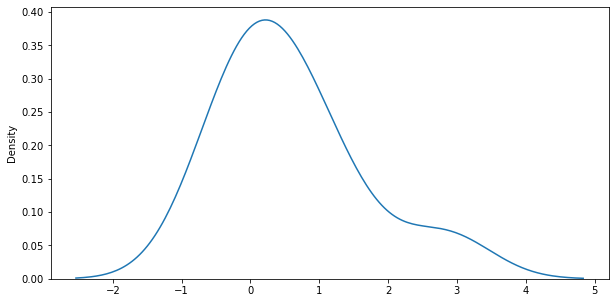

In [19]:

sns.distplot(df_fifa.skew(),hist=False,kde=True)
#by visualizing plot we conclude our data is not normal

# outliers

# Based on boxplot

In [20]:
df_num = df_fifa.select_dtypes(include = np.number)
df_num.head(3)

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
0,31,94,94,5,4,4,10,5.583333,159
1,33,94,94,5,4,5,7,6.166667,183
2,26,92,93,5,5,5,10,5.750000,150


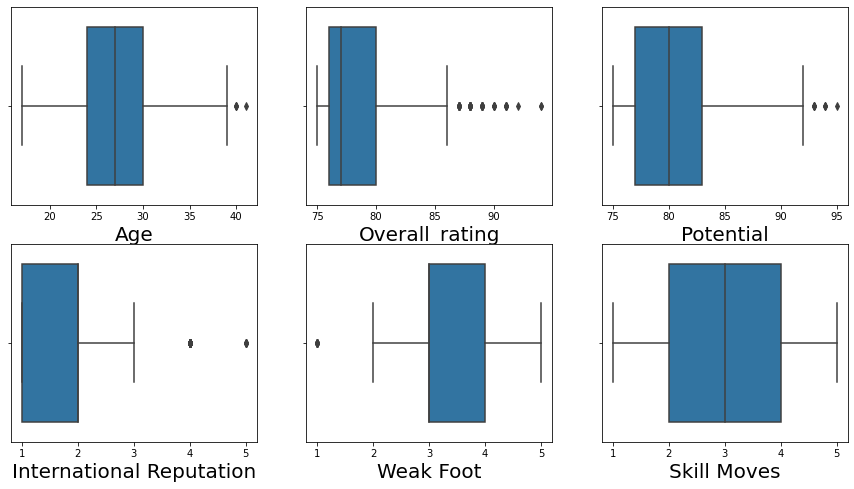

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label

for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

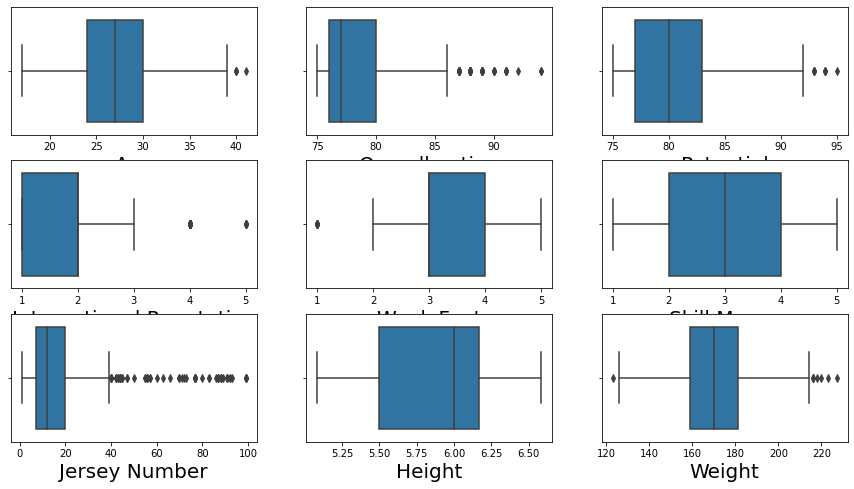

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(15,8))
for i,j in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[i], whis=1.5, ax=j, orient="h")
    z.set_xlabel(i, fontsize = 20)

In [ ]:
#intrepetation :Age,Overall rating,POtential,International Reputation,Weak Foot

# Based on IQR

In [25]:
q1=df_fifa.quantile(0.25)
q1

Age                          24.0
Overall_rating               76.0
Potential                    77.0
International Reputation      1.0
Weak Foot                     3.0
Skill Moves                   2.0
Jersey Number                 7.0
Height                        5.5
Weight                      159.0
Name: 0.25, dtype: float64

In [26]:
q3=df_fifa.quantile(0.75)
q3

Age                          30.000000
Overall_rating               80.000000
Potential                    83.000000
International Reputation      2.000000
Weak Foot                     4.000000
Skill Moves                   4.000000
Jersey Number                20.000000
Height                        6.166667
Weight                      181.000000
Name: 0.75, dtype: float64

In [27]:
IQR=q3-q1
IQR

Age                          6.000000
Overall_rating               4.000000
Potential                    6.000000
International Reputation     1.000000
Weak Foot                    1.000000
Skill Moves                  2.000000
Jersey Number               13.000000
Height                       0.666667
Weight                      22.000000
dtype: float64

In [28]:
df_fifa_iqr = df_fifa[~((df_fifa <(q1-1.5*IQR))| (df_fifa>(q3+1.5*IQR))).any(axis=1)]
df_fifa_iqr.head(1)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
55,L. SanÃ©,22,Germany,86,92,Manchester City,Left,2,3,4,High/ Medium,LW,19,6.0,165


In [29]:
df_fifa_iqr.shape

(1837, 15)

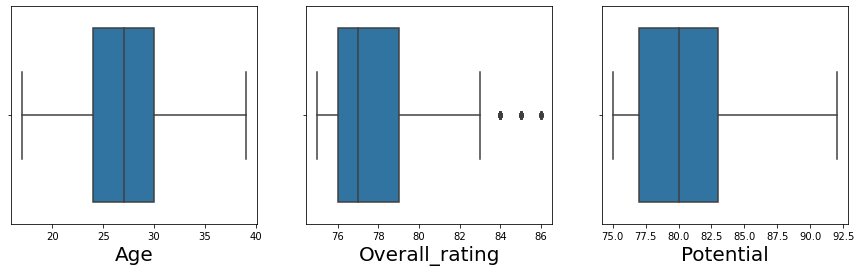

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
variables=['Age','Overall_rating','Potential','International Reputation','Weak Foot']
# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: set the font size of the x-axis label
for variable, subplot in zip(df_fifa_iqr[variables], ax.flatten()):
    z = sns.boxplot(x=df_fifa_iqr[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

In [30]:
df=df_fifa_iqr.select_dtypes(include=np.number)

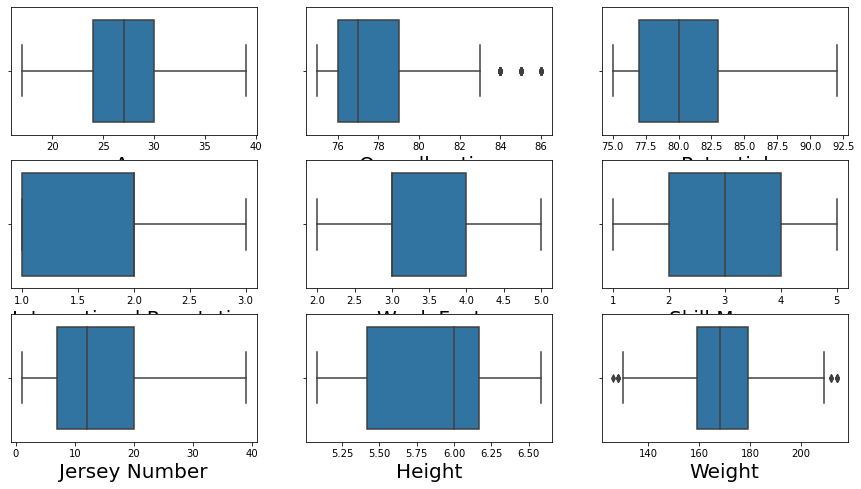

In [31]:
fig, ax= plt.subplots(3,3, figsize=(15,8))
for i, j in zip(df.columns, ax.flatten()):
    z=sns.boxplot(x=df_fifa_iqr[i], ax=j, whis=1.5, orient="h")
    z.set_xlabel(i, fontsize=20)

In [ ]:
#Interpretation: The outliers have been removed and the data can be used for analysis.
#However, note there are some more outliers present in the data. 
#These outliers are based on the new IQR and are not removed.

 a)Assuming age as population, perform the central limit theorem with sample size of 200.
Find the standard error and the mean of sampling distribution. 
Compare the results with population mean and standard deviation.
Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease
with an increase in sample size


In [29]:
#central limit theorem

In [28]:
population_array=df_fifa['Age']
population_array
n_samples=200
sample_means=[]
for i in range(n_samples):
        sample=np.random.choice(population_array,size=500)
        sample_mean=np.mean(sample)
        sample_means.append(sample_mean)
print('sample_means'':',sample_means)

sample_means: [27.48, 27.036, 27.17, 27.292, 27.252, 27.36, 27.028, 27.126, 27.592, 27.524, 27.186, 27.116, 26.996, 27.422, 27.454, 27.12, 27.132, 27.468, 27.306, 27.344, 27.112, 27.338, 26.812, 27.288, 27.158, 26.87, 27.262, 27.588, 27.286, 27.438, 27.022, 27.094, 27.042, 27.324, 27.3, 26.95, 27.146, 27.254, 27.492, 27.5, 27.122, 27.162, 27.356, 27.342, 27.248, 27.25, 27.104, 27.148, 26.996, 27.336, 26.84, 27.412, 27.182, 27.174, 27.164, 27.088, 27.202, 26.814, 27.08, 27.598, 27.334, 27.17, 27.182, 27.212, 27.152, 27.382, 27.602, 27.242, 27.292, 27.342, 27.232, 27.038, 27.212, 27.32, 27.182, 27.138, 27.048, 27.176, 27.356, 27.146, 27.482, 27.53, 27.446, 26.876, 27.368, 27.142, 27.42, 27.156, 27.304, 27.422, 27.138, 27.148, 27.158, 27.23, 27.34, 27.35, 27.11, 27.458, 27.046, 27.47, 27.152, 27.118, 27.23, 27.244, 27.044, 27.074, 27.274, 27.192, 27.504, 27.098, 27.416, 27.434, 27.374, 27.278, 27.388, 27.064, 27.104, 27.368, 27.334, 27.186, 27.408, 27.048, 27.092, 27.41, 27.186, 27.092, 2

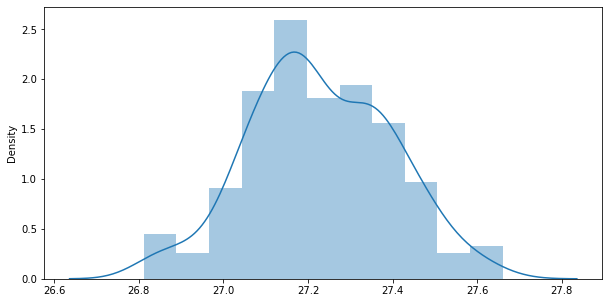

In [30]:
sns.distplot(sample_means)
plt.show()

In [31]:
#standard error
std_error=np.std(sample_means)
std_error

0.1685026516111839

In [32]:
#standard error
std_age=np.std(df_fifa['Age'])
n=len(df_fifa['Age'])
standard_error=std_age/np.sqrt(n)
standard_error

0.08626965790473475

In [33]:
#the mean of sampling distribution. 
#sapmling with replacemnet 
sample_wr = random.choices(population = df_fifa['Age'], k = 20)

# print the sample
print('Sample with replacement:', sample_wr)



Sample with replacement: [31, 33, 27, 29, 26, 30, 35, 28, 23, 23, 25, 30, 28, 24, 28, 24, 30, 27, 23, 26]


In [34]:
#the mean of sampling distribution. 
m_s=np.mean(sample_means)
m_s

27.228419999999996

In [35]:
#Compare the results with population mean and standard deviation.
pop_mean=np.mean(df_fifa['Age'])
print(pop_mean)
pop_std=np.std(df_fifa['Age'])
print(pop_std)
#pop_mean is 9 times more than pop_std


27.2315
3.8580963894127795


In [37]:
#Standard error decreases when sample size increases –
#as the sample size gets closer to the true size of the population, 
#the sample means cluster more and more around the true population mean.




#The standard error is also inversely proportional to the sample size;
#the larger the sample size, the smaller the standard error because
#the statistic will approach the actual value.
#The standard error is considered part of inferential statistics.
#It represents the standard deviation of the mean within a dataset.

# b)Is there any evidence that the players overall rating is greater than 80?

In [42]:
df_fifa.head(1)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159


<AxesSubplot:xlabel='Overall_rating', ylabel='count'>

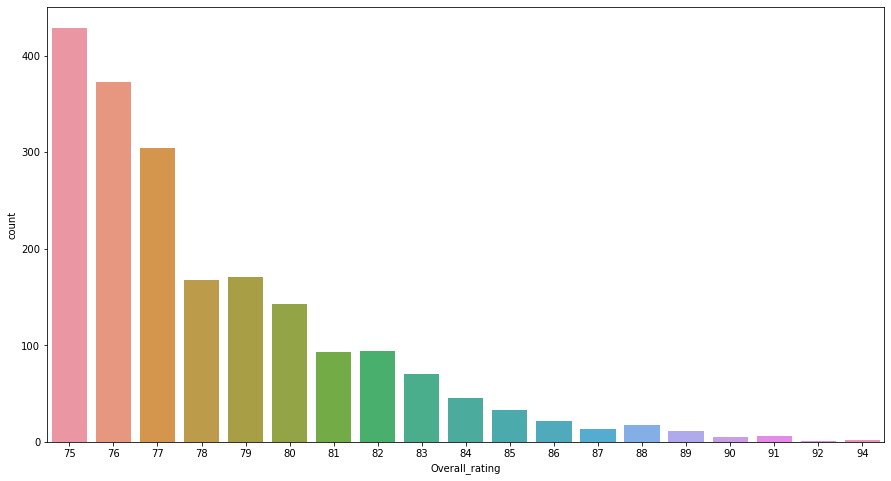

In [34]:
plt.figure(figsize=(15,8))
sns.countplot(df_fifa["Overall_rating"])
#so you can see there is rating below 80 also so there is yes  evidance that rating is less than 80

In [36]:
boxcox_over=stats.boxcox(df_fifa['Overall_rating'])[0]

In [37]:
pvalue=stats.shapiro(boxcox_over)
pvalue


ShapiroResult(statistic=1.0, pvalue=1.0)

In [105]:
#hypothesis testing
#ho:overall_rating<=80
#ha:overall_rating>80


In [38]:
z_score, pval = stests.ztest(x1 = boxcox_over, value = 80, alternative = 'larger')
print("Z-score: ", z_score)
print("p-value: ", pval)
if pval>0.05:
    print('fail to reject null')
else:
    print('alternate accept')

Z-score:  -2.5751162086368402e+20
p-value:  1.0
fail to reject null


In [ ]:
#we  reject null and overall rating is not greater than to 80

 c)Perform the statistical test to identify whether preferred foot has any impact on potential. 
Also, perform the graphical analysis.

In [41]:
df_fifa.head(3)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150


<AxesSubplot:xlabel='Preferred Foot', ylabel='Potential'>

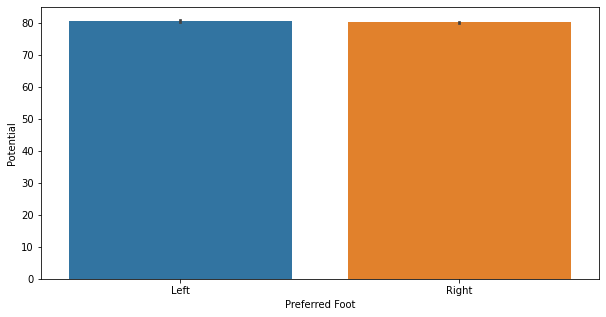

In [48]:
sns.barplot(data=df_fifa, x="Preferred Foot", y="Potential")

In [ ]:
we have a categorical column and a continous column and catgeorical has 2 samples left and right so we can use 
2- sample - Ttest

In [42]:
df_fifa['Preferred Foot'].unique()

array(['Left', 'Right'], dtype=object)

In [43]:
df_fifa['Preferred Foot'].value_counts()

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

In [44]:
len(df_fifa['Preferred Foot'])

2000

In [45]:
#check normality
print(stats.shapiro(df_fifa['Preferred Foot']=='Left'))
print(stats.shapiro(df_fifa['Preferred Foot']=='Right'))
print(stats.shapiro(df_fifa['Potential']))
#preferred foot data is not normal so we have to normal the data by using boxcox


ShapiroResult(statistic=0.523396909236908, pvalue=0.0)
ShapiroResult(statistic=0.523395836353302, pvalue=0.0)
ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)


In [46]:
x=df_fifa[df_fifa['Preferred Foot']=='Left']['Potential']
y=df_fifa[df_fifa['Preferred Foot']=='Right']['Potential']

In [47]:
#we used boxcox to change data to normal data
box_x=stats.boxcox(x)[0]
box_y=stats.boxcox(y)[0]


In [49]:
print(stats.shapiro(box_x))
print(stats.shapiro(box_y))


ShapiroResult(statistic=1.0, pvalue=1.0)
ShapiroResult(statistic=1.0, pvalue=1.0)


In [50]:
#to check variance test
left=box_x
right=box_y
stats.levene(left,right)
#variance are equal

LeveneResult(statistic=3630.9884767001, pvalue=0.0)

In [76]:
#is preferred foot impacting on potential
#ho:mu of preferred left=mu of preferred right
#ha:mu of preferred left!=mu of preferred right

In [51]:
samp_mean_1 = np.mean(left)
samp_mean_2  =np.mean(right)
samp_std_1 = np.std(left)
samp_std_2 = np.mean(right)
n1 = len(left)
n2 = len(right)
value=0
denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
zscore = ((samp_mean_1 - samp_mean_2) - (value)) / denominator
    
zscore  


9.386494221742003

In [52]:
p_value = stats.norm.cdf(zscore)
p_value

1.0

In [53]:
if p_value>0.05:
    print('fail to reject null')
else:
    print('alternate accept')


fail to reject null


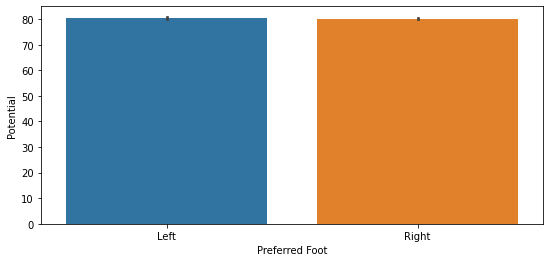

In [54]:
#graphical analysis

plt.figure(figsize=(9,4))
sns.barplot(x='Preferred Foot',y='Potential',data=df_fifa)
plt.show()

In [ ]:
d)Perform the statistical test to identify the relation between the overall rating and potential.
[Assume both are continuous data points].



In [ ]:
#now data is both are continous so we can use pearson correlation
#hypothesis
#ho : there is no relation
#ha : there is a relation

In [55]:
#checking normality

pval_1=shapiro(df_fifa['Overall_rating'])
print(pval_1)
pval_2=shapiro(df_fifa['Potential'])
print(pval_2)

#data is not normal

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)
ShapiroResult(statistic=0.9384800791740417, pvalue=5.016414837142018e-28)


In [56]:
boxcox_over=stats.boxcox(df_fifa['Overall_rating'])[0]
print(shapiro(boxcox_over))

ShapiroResult(statistic=1.0, pvalue=1.0)


In [57]:
box_pot=stats.boxcox(df_fifa['Potential'])[0]
print(shapiro(box_pot))

ShapiroResult(statistic=1.0, pvalue=1.0)


In [60]:
stats.pearsonr(df_fifa["Potential"], df_fifa["Overall_rating"])

(0.7326945574179996, 0.0)

In [ ]:
p is less tha 0.05 so fail to reject null and accpet ha
# there is a relationship

In [58]:
df_fifa[['Overall_rating','Potential']].corr()
#there is strong positive correlation bw overall rating and potential

,Overall_rating,Potential
Overall_rating,1.000000,0.732695
Potential,0.732695,1.000000


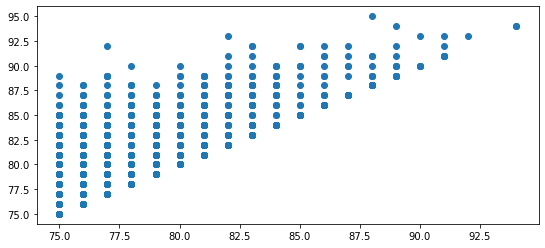

In [59]:
plt.figure(figsize=(9,4))
plt.scatter('Overall_rating','Potential',data=df_fifa)
plt.show()

In [ ]:
e)Does skill move have any effect in overall rating. Perform the graphical analysis
and the statistical analysis

In [61]:
df_fifa.head(1)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159


In [63]:
#checking data['overall rating'] is normal
shapiro(df_fifa['Overall_rating'])
#data is not normal

ShapiroResult(statistic=0.8525537848472595, pvalue=1.0221183102662362e-39)

In [64]:
shapiro(boxcox_over)
#data is normal

ShapiroResult(statistic=1.0, pvalue=1.0)

In [65]:
#pearson correlation
#ho:skill move has no effect on overall rating
#ha:skill move has effecton overall rating
df_fifa.corr()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
Age,1.000000,0.063348,-0.511339,0.314808,-0.060940,-0.206624,-0.039370,0.065510,0.151674
Overall_rating,0.063348,1.000000,0.732695,0.661603,0.103579,0.081593,-0.094865,0.041815,0.055342
Potential,-0.511339,0.732695,1.000000,0.327717,0.099179,0.127366,-0.037827,0.030624,-0.017228
International Reputation,0.314808,0.661603,0.327717,1.000000,0.105748,0.088652,-0.032622,0.041700,0.071167
Weak Foot,-0.060940,0.103579,0.099179,0.105748,1.000000,0.342505,0.038840,-0.187942,-0.201137
Skill Moves,-0.206624,0.081593,0.127366,0.088652,0.342505,1.000000,0.065322,-0.472939,-0.528310
Jersey Number,-0.039370,-0.094865,-0.037827,-0.032622,0.038840,0.065322,1.000000,0.005081,-0.015377
Height,0.065510,0.041815,0.030624,0.041700,-0.187942,-0.472939,0.005081,1.000000,0.544016
Weight,0.151674,0.055342,-0.017228,0.071167,-0.201137,-0.528310,-0.015377,0.544016,1.000000


In [66]:
stats.pearsonr(df_fifa['Overall_rating'],df_fifa['Skill Moves'])

(0.08159348248403268, 0.0002594145569635645)

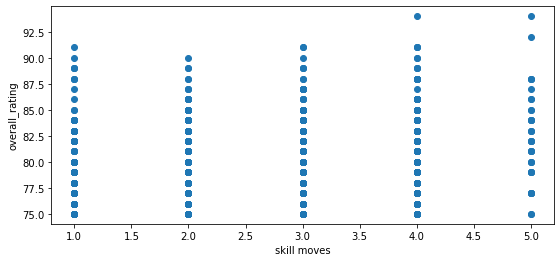

In [67]:
plt.figure(figsize=(9,4))
plt.scatter(x=df_fifa['Skill Moves'],y=df_fifa['Overall_rating'])
plt.xlabel('skill moves')
plt.ylabel('overall_rating')
plt.show()
#we accept ha
#skill moves is constant but overall rating is increasing

# b)

In [107]:
df_phone=pd.read_csv('phone.csv')
df_phone.head()


,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [108]:
df_phone.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [109]:
df_phone.isnull().sum()

date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

In [110]:
df_phone.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [111]:
df_phone.describe(include='object')

,date,item,month,network,network_type
count,820,820,820,820,820
unique,738,3,5,7,4
top,16-01-15 18:07,call,2014-11,Vodafone,mobile
freq,6,388,229,215,601


# Non standard missing values

In [112]:
df_phone.isnull().values.any()

False

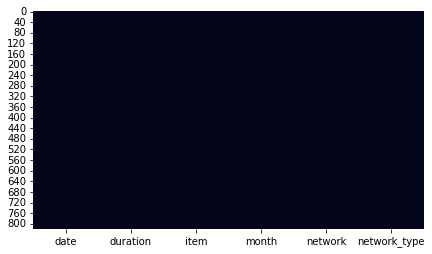

In [113]:
plt.figure(figsize=(7,4))
sns.heatmap(df_phone.isnull(),cbar = False)
plt.show()

In [114]:
df_n=df_phone.select_dtypes(include=np.number)
df_n.head()

,duration
0,221.321120
1,81.610599
2,143.109111
3,111.888670
4,246.695171


In [115]:
df_o=df_phone.select_dtypes(include='object')
df_o.head()

,date,item,month,network,network_type
0,15-10-14 6:58,data,2014-11,data,data
1,15-10-14 6:58,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,call,2014-11,Meteor,mobile
3,15-10-14 14:48,call,2014-11,Tesco,mobile
4,15-10-14 17:27,call,2014-11,Tesco,mobile


In [116]:
df_phone.describe(include='object')

,date,item,month,network,network_type
count,820,820,820,820,820
unique,738,3,5,7,4
top,16-01-15 18:07,call,2014-11,Vodafone,mobile
freq,6,388,229,215,601


In [117]:
print(df_phone['date'].unique())
print(df_phone['date'].value_counts())


['15-10-14 6:58' '15-10-14 14:46' '15-10-14 14:48' '15-10-14 17:27'
 '15-10-14 18:55' '16-10-14 6:58' '16-10-14 15:01' '16-10-14 15:12'
 '16-10-14 15:30' '16-10-14 16:21' '16-10-14 22:18' '16-10-14 22:21'
 '17-10-14 6:58' '17-10-14 10:53' '17-10-14 11:19' '17-10-14 11:20'
 '17-10-14 17:22' '17-10-14 17:23' '17-10-14 17:26' '17-10-14 17:29'
 '17-10-14 17:30' '17-10-14 17:42' '17-10-14 17:44' '18-10-14 6:58'
 '18-10-14 11:51' '18-10-14 12:06' '18-10-14 13:08' '18-10-14 13:10'
 '18-10-14 14:01' '18-10-14 18:52' '18-10-14 20:44' '18-10-14 21:04'
 '18-10-14 21:06' '18-10-14 21:23' '18-10-14 22:37' '19-10-14 6:58'
 '19-10-14 14:47' '19-10-14 15:46' '19-10-14 16:21' '19-10-14 16:30'
 '19-10-14 20:25' '20-10-14 6:58' '20-10-14 9:43' '20-10-14 13:55'
 '20-10-14 13:56' '20-10-14 18:14' '20-10-14 18:24' '20-10-14 19:59'
 '20-10-14 20:16' '21-10-14 6:58' '21-10-14 16:17' '22-10-14 6:58'
 '22-10-14 12:04' '23-10-14 6:58' '23-10-14 8:34' '23-10-14 9:45'
 '23-10-14 10:46' '23-10-14 10:54' '23-10-14 1

In [118]:
print(df_phone['item'].unique())
print(df_phone['item'].value_counts())

['data' 'call' 'sms']
call    388
sms     282
data    150
Name: item, dtype: int64


In [119]:
print(df_phone['month'].unique())
print(df_phone['month'].value_counts())

['2014-11' '2014-12' '2015-01' '2015-02' '2015-03']
2014-11    229
2015-01    205
2014-12    153
2015-02    135
2015-03     98
Name: month, dtype: int64


In [120]:
print(df_phone['network'].unique())
print(df_phone['network'].value_counts())

['data' 'Vodafone' 'Meteor' 'Tesco' 'Three' 'voicemail' 'landline']
Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64


In [121]:
print(df_phone['network_type'].unique())
print(df_phone['network_type'].value_counts())

['data' 'mobile' 'voicemail' 'landline']
mobile       601
data         150
landline      42
voicemail     27
Name: network_type, dtype: int64


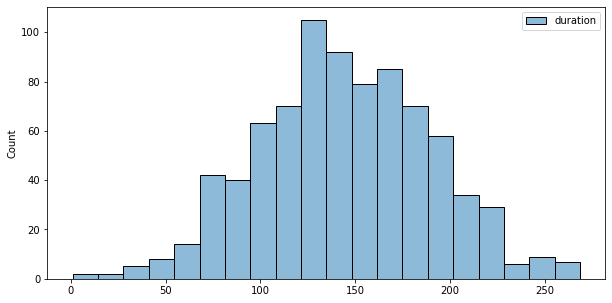

In [122]:
sns.histplot(df_phone)
plt.show()

# Outliers detection

# Based on IQR

In [123]:
df_n.head()

,duration
0,221.321120
1,81.610599
2,143.109111
3,111.888670
4,246.695171


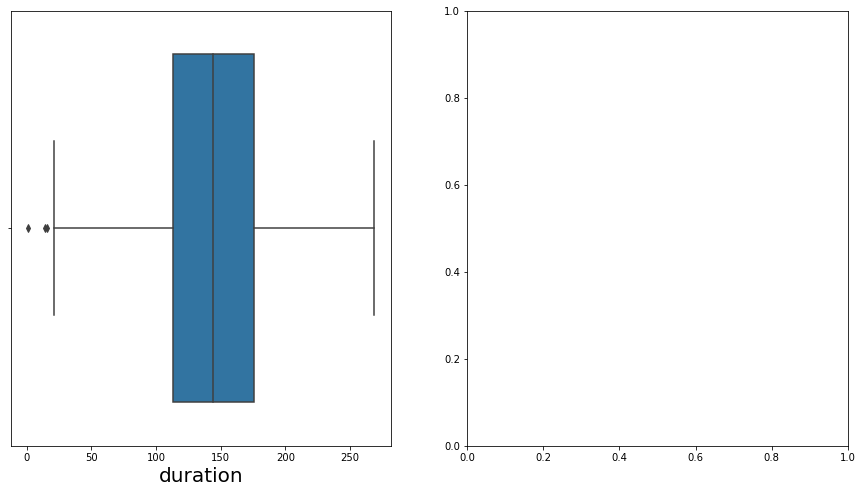

In [124]:


fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_n.columns, ax.flatten()):
    z = sns.boxplot(x = df_n[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

In [125]:
# obtain the first quartile
Q1 = df_n.quantile(0.25)

# obtain the third quartile
Q3 = df_n.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

duration    63.015821
dtype: float64


In [126]:
df_phone_iqr = df_phone[~((df_phone < (Q1 - 1.5 * IQR)) |(df_phone > (Q3 + 1.5 * IQR))).any(axis=1)]
df_phone_iqr.head()
print(df_phone_iqr.shape)

(817, 6)


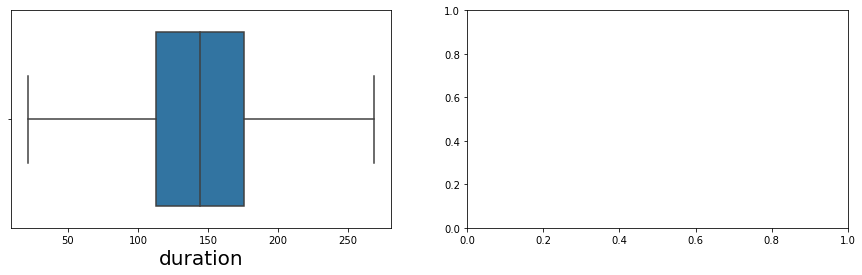

In [127]:
# consider the variables which has outliers
variables = ['duration']


fig, ax = plt.subplots(1,2, figsize=(15, 4))


for variable, subplot in zip(df_phone_iqr[variables], ax.flatten()):
    z = sns.boxplot(x=df_phone_iqr[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)

In [162]:
#outliers has been removed

In [ ]:
a) With 95% & 99% Confidence Interval 
find the range estimate of average duration calls made by all the network.
Which of the Intervals are wider? Interpret the results.

In [128]:
#checking normality
stat,pval=shapiro(df_phone['duration'])
pval


0.701244592666626

In [130]:

samp_mean=np.mean(df_phone['duration'])
samp_std=np.std(df_phone['duration'])
n=len(df_phone['duration'])

#99% confidence interval
interval_99 = stats.norm.interval(0.99, loc = samp_mean, scale = samp_std / np.sqrt(n))
print(interval_99)

#95% confidence interval
interval_95 = stats.norm.interval(0.95, loc = samp_mean, scale = samp_std / np.sqrt(n))
print(interval_95)

#99% is wider than 95% confidence interval
#while increasing in confidence level then range of estimation is also increases


(140.1977416835259, 148.41212943614502)
(141.1797470762666, 147.4301240434043)


In [ ]:
b)Perform statistical analysis to 
check whether the networks are equally distributed in the dataset


In [139]:
#Ho: Observed = Expected (Networks are equally distributed)
#Ha : Observed ≠ Expected (Networks are not equally distributed)
df1=pd.crosstab(df_phone['network'],df_phone['network_type'])
df1
pval=stats.chi2_contingency(df1)
pval
#networks are not equally distributed

(2460.0,
 0.0,
 18,
 array([[ 15.91463415,   4.45609756,  63.76463415,   2.86463415],
        [ 15.36585366,   4.30243902,  61.56585366,   2.76585366],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 27.43902439,   7.68292683, 109.93902439,   4.93902439],
        [  7.68292683,   2.15121951,  30.78292683,   1.38292683],
        [  4.93902439,   1.38292683,  19.78902439,   0.88902439]]))

In [ ]:
c) Plot the distribution of duration with respect to each network in the same graph and 
Interpret the results from the graph

In [ ]:
sns.distplot(df_Phonedf_[Phone['network']=='Vodafone']['duration'])
sns.distplot(df_Phone[df_Phone['network']=='Three']['duration'])
sns.distplot(df_Phone[df_Phone['network']=='data']['duration'])
sns.distplot(df_Phone[df_Phone['network']=='Meteor']['duration'])
sns.distplot(df_Phone[df_Phone['network']=='Tesco']['duration'])
sns.distplot(df_Phone[df_Phone['network']=='landline']['duration'])
sns.distplot(df_Phone[df_Phone['network']=='voicemail']['duration'])

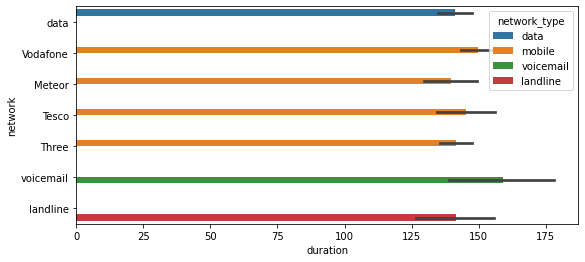

In [140]:
plt.figure(figsize=(9,4))
sns.barplot(df_phone['duration'],df_phone['network'],hue=df_phone['network_type'])
plt.show()

In [ ]:
d)	Perform statistical tests to identify the relation between item and duration. Detailed 
explanation of relation between the classes is required


In [141]:
df_phone.head(1)

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.32112,data,2014-11,data,data


In [150]:
#checking normality
stat,pval=shapiro(df_phone['duration'])
print(pval)
#levene test
stats.levene(call,data,sms)
call = df_phone[df_phone['item']=='call']['duration']
call
data = df_phone[df_phone['item']=='data']['duration']
sms = df_phone[df_phone['item']=='sms']['duration']


0.701244592666626


In [143]:
df_phone['item'].value_counts()


call    388
sms     282
data    150
Name: item, dtype: int64

In [144]:
call = df_phone[df_phone['item']=='call']['duration']
data = df_phone[df_phone['item']=='data']['duration']
sms = df_phone[df_phone['item']=='sms']['duration']

p=stats.f_oneway(call,data,sms)
p


F_onewayResult(statistic=1.9313964906864995, pvalue=0.1456068656611744)

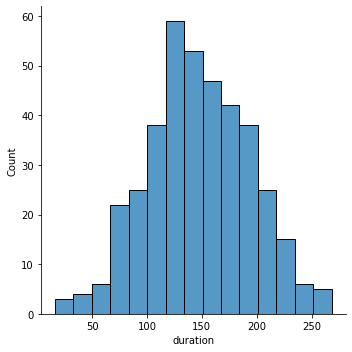

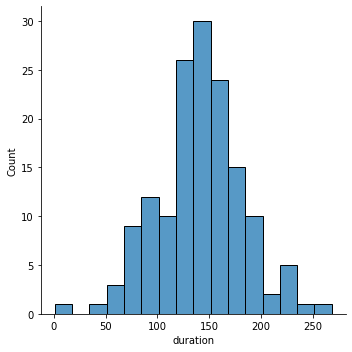

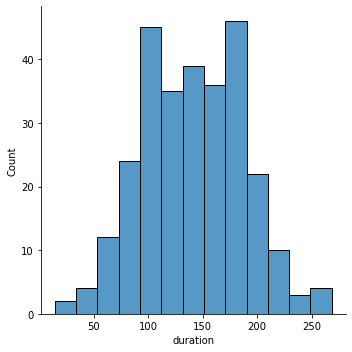

In [145]:
#adhoc analysis
import statsmodels.stats.multicomp as mc
mc=mc.MultiComparison(df_phone['duration'],groups=df_phone['item'])
post_hoc=mc.tukeyhsd(alpha=0.05)
post_hoc.summary()
sns.displot(call)
sns.displot(data)
sns.displot(sms)

In [ ]:
e)	Perform statistical tests to identify the relation between network and network_type. 

In [148]:
df_phone['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline'], dtype=object)

In [149]:
df_phone['network_type'].unique()

array(['data', 'mobile', 'voicemail', 'landline'], dtype=object)

In [146]:
#Ho: Observed = Expected (Network and Network_type are not related)
#Ha : Observed ≠ Expected (Network and Network_type are related)

df_phone.head(2)


df1=pd.crosstab(df_phone['network'],df_phone['network_type'])
df1
pval=stats.chi2_contingency(df1)
pval
#networks and network_type are related


(2460.0,
 0.0,
 18,
 array([[ 15.91463415,   4.45609756,  63.76463415,   2.86463415],
        [ 15.36585366,   4.30243902,  61.56585366,   2.76585366],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 39.32926829,  11.01219512, 157.57926829,   7.07926829],
        [ 27.43902439,   7.68292683, 109.93902439,   4.93902439],
        [  7.68292683,   2.15121951,  30.78292683,   1.38292683],
        [  4.93902439,   1.38292683,  19.78902439,   0.88902439]]))